# Task 4.10 Part-1

## Contents

### Import Libraries and Dataframes
### Checking PII data
### Create regional segmentation of data
### Determine whether there’s a difference in spending habits between the different U.S. regions
### Create an exclusion flag for low-activity customers
### Customer profiling
### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
### Compare customer profiles with regions and departments
### Visualizations

In [2]:
# import data and libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# setting path
path = r'/Users/shikhakamboj/Documents/JAN-2025 Instacart Basket Analysis'

# import data sets
df_instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

# 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [5]:
df_instacart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              float64 
 7   add_to_cart_order       float64 
 8   reordered               float64 
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  match                   category
 14  price_range_loc         object  
 15  busiest day             object  
 16  busiest days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  avg_product_price       float64 
 21  spendi

first_name and last_name: These directly identify individuals and must be handled securely (e.g., anonymized or removed).

# 3(a). Create a regional segmentation of the data

In [8]:
# Assign Northeast Region

df_instacart.loc[df_instacart['state'] == 'Maine', 'region'] = 'Northeast'
df_instacart.loc[df_instacart['state'] == 'New Hampshire', 'region'] = 'Northeast'
df_instacart.loc[df_instacart['state'] == 'Vermont', 'region'] = 'Northeast'
df_instacart.loc[df_instacart['state'] == 'Pennsylvania', 'region'] = 'Northeast'
df_instacart.loc[df_instacart['state'] == 'Massachusetts', 'region'] = 'Northeast'
df_instacart.loc[df_instacart['state'] == 'Rhode Island', 'region'] = 'Northeast'
df_instacart.loc[df_instacart['state'] == 'Connecticut', 'region'] = 'Northeast'
df_instacart.loc[df_instacart['state'] == 'New York', 'region'] = 'Northeast'
df_instacart.loc[df_instacart['state'] == 'New Jersey', 'region'] = 'Northeast'

In [9]:
# Assign Midwest Region

df_instacart.loc[df_instacart['state'] == 'Wisconsin', 'region'] = 'Midwest'
df_instacart.loc[df_instacart['state'] == 'Michigan', 'region'] = 'Midwest'
df_instacart.loc[df_instacart['state'] == 'Illinois', 'region'] = 'Midwest'
df_instacart.loc[df_instacart['state'] == 'Indiana', 'region'] = 'Midwest'
df_instacart.loc[df_instacart['state'] == 'Ohio', 'region'] = 'Midwest'
df_instacart.loc[df_instacart['state'] == 'North Dakota', 'region'] = 'Midwest'
df_instacart.loc[df_instacart['state'] == 'South Dakota', 'region'] = 'Midwest'
df_instacart.loc[df_instacart['state'] == 'Nebraska', 'region'] = 'Midwest'
df_instacart.loc[df_instacart['state'] == 'Kansas', 'region'] = 'Midwest'
df_instacart.loc[df_instacart['state'] == 'Minnesota', 'region'] = 'Midwest'
df_instacart.loc[df_instacart['state'] == 'Iowa', 'region'] = 'Midwest'
df_instacart.loc[df_instacart['state'] == 'Missouri', 'region'] = 'Midwest'

In [10]:
# Assign South Region

df_instacart.loc[df_instacart['state'] == 'Delaware', 'region'] = 'South'
df_instacart.loc[df_instacart['state'] == 'Maryland', 'region'] = 'South'
df_instacart.loc[df_instacart['state'] == 'District of Columbia', 'region'] = 'South'
df_instacart.loc[df_instacart['state'] == 'Virginia', 'region'] = 'South'
df_instacart.loc[df_instacart['state'] == 'West Virginia', 'region'] = 'South'
df_instacart.loc[df_instacart['state'] == 'North Carolina', 'region'] = 'South'
df_instacart.loc[df_instacart['state'] == 'South Carolina', 'region'] = 'South'
df_instacart.loc[df_instacart['state'] == 'Georgia', 'region'] = 'South'
df_instacart.loc[df_instacart['state'] == 'Florida', 'region'] = 'South'
df_instacart.loc[df_instacart['state'] == 'Kentucky', 'region'] = 'South'
df_instacart.loc[df_instacart['state'] == 'Tennessee', 'region'] = 'South'
df_instacart.loc[df_instacart['state'] == 'Mississippi', 'region'] = 'South'
df_instacart.loc[df_instacart['state'] == 'Alabama', 'region'] = 'South'
df_instacart.loc[df_instacart['state'] == 'Oklahoma', 'region'] = 'South'
df_instacart.loc[df_instacart['state'] == 'Texas', 'region'] = 'South'
df_instacart.loc[df_instacart['state'] == 'Arkansas', 'region'] = 'South'
df_instacart.loc[df_instacart['state'] == 'Louisiana', 'region'] = 'South'

In [11]:
# Assign West Region

df_instacart.loc[df_instacart['state'] == 'Idaho', 'region'] = 'West'
df_instacart.loc[df_instacart['state'] == 'Montana', 'region'] = 'West'
df_instacart.loc[df_instacart['state'] == 'Wyoming', 'region'] = 'West'
df_instacart.loc[df_instacart['state'] == 'Nevada', 'region'] = 'West'
df_instacart.loc[df_instacart['state'] == 'Utah', 'region'] = 'West'
df_instacart.loc[df_instacart['state'] == 'Colorado', 'region'] = 'West'
df_instacart.loc[df_instacart['state'] == 'Arizona', 'region'] = 'West'
df_instacart.loc[df_instacart['state'] == 'New Mexico', 'region'] = 'West'
df_instacart.loc[df_instacart['state'] == 'Alaska', 'region'] = 'West'
df_instacart.loc[df_instacart['state'] == 'Washington', 'region'] = 'West'
df_instacart.loc[df_instacart['state'] == 'Oregon', 'region'] = 'West'
df_instacart.loc[df_instacart['state'] == 'California', 'region'] = 'West'
df_instacart.loc[df_instacart['state'] == 'Hawaii', 'region'] = 'West'

In [12]:
df_instacart['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

# 3(b) Determine Whether there’s a difference in spending habits between the different U.S. regions. 

In [14]:
# Crosstab Region to spending flag

crosstab = pd.crosstab(df_instacart['region'], df_instacart['spending_flag'], dropna = False)

In [15]:
crosstab.to_clipboard()

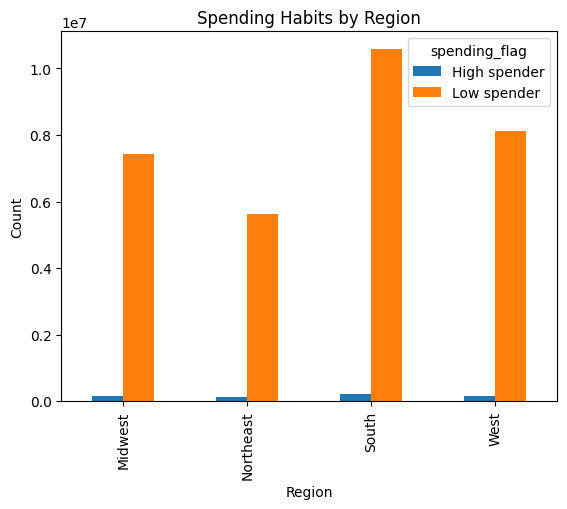

In [16]:
# Visualization of the Spending Habits by Region

bar_chart = crosstab.plot(kind='bar', title='Spending Habits by Region').set(xlabel='Region', ylabel='Count')

# 4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. 

In [18]:
# Create a flag for customers with less than 5 orders

df_instacart.loc[df_instacart['max_order'] < 5, 'activity_flag'] = 'low-activity customer'
df_instacart.loc[df_instacart['max_order'] >= 5, 'activity_flag'] = 'high-activity customer'

In [19]:
# Checking value counts

df_instacart['activity_flag'].value_counts(dropna = False)

activity_flag
high-activity customer    30964564
low-activity customer      1440295
Name: count, dtype: int64

In [20]:
# Excluding the low-activity customers from the dataframe

df_excluded = df_instacart[df_instacart['activity_flag'] != 'low-activity customer']

In [21]:
# Exported the new dataframe

df_excluded.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_customer_excluded.pkl'))

# 5 and 6. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

# Age

In [24]:
# Create a profiling variable based on Age

df_excluded = df_excluded.copy()

df_excluded.loc[df_excluded['age'] <= 25, 'age_group'] = 'young adult'
df_excluded.loc[(df_excluded['age'] > 25) & (df_excluded['age'] <= 40), 'age_group'] = 'adult'
df_excluded.loc[(df_excluded['age'] > 40) & (df_excluded['age'] <= 65), 'age_group'] = 'middle-aged'
df_excluded.loc[df_excluded['age'] > 65, 'age_group'] = 'senior'

In [25]:
# Checking value counts for each age group

df_excluded['age_group'].value_counts(dropna = False)

age_group
middle-aged    12085297
senior          7730834
adult           7283915
young adult     3864518
Name: count, dtype: int64

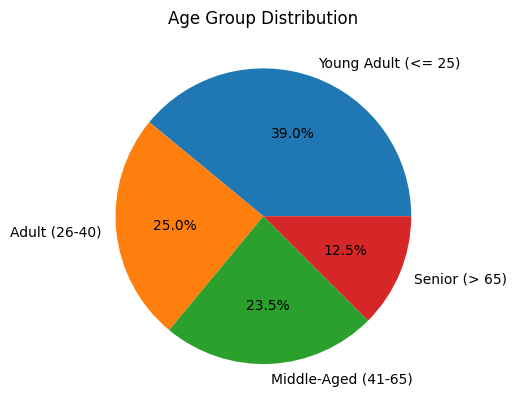

In [26]:
# Create a Pie chart for age group distribution

detailed_labels = ['Young Adult (<= 25)', 'Adult (26-40)', 'Middle-Aged (41-65)', 'Senior (> 65)']

Pie_chart_age_distribution = df_excluded['age_group'].value_counts().plot(kind='pie', autopct='%1.1f%%',labels=detailed_labels, title='Age Group Distribution', ylabel='')

In [27]:
# Export chart

Pie_chart_age_distribution.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_distribution_pie_chart.png'))

# Income

In [29]:
# Create a profiling variable based on Income

df_excluded = df_excluded.copy()
df_excluded.loc[df_excluded['income'] <= 60000, 'income_group'] = 'low-income'
df_excluded.loc[(df_excluded['income'] > 60000) & (df_excluded['income'] <= 150000), 'income_group'] = 'middle-income'
df_excluded.loc[df_excluded['income'] > 150000, 'income_group'] = 'high-income'

In [30]:
# Checking value counts

df_excluded['income_group'].value_counts(dropna = False)

income_group
middle-income    21266729
low-income        5803301
high-income       3894534
Name: count, dtype: int64

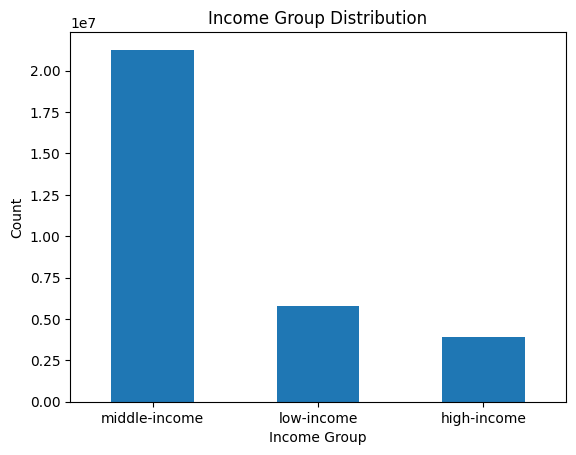

In [31]:
income_group_distribution_bar_chart = df_excluded['income_group'].value_counts().plot(kind='bar', title='Income Group Distribution', xlabel='Income Group', ylabel='Count', rot =0)

In [32]:
# Export the bar chart

income_group_distribution_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_distribution_bar_chart.png'))

# Number of Dependents

In [34]:
# Create a profiling variable based on number of dependents

df_excluded = df_excluded.copy()

df_excluded.loc[df_excluded['number_of_dependents'] == 0, 'dependants_flag'] = 'no dependent'
df_excluded.loc[df_excluded['number_of_dependents'] >= 1, 'dependants_flag'] = 'Dependent'

In [35]:
# Checking value counts

df_excluded['dependants_flag'].value_counts(dropna = False)

dependants_flag
Dependent       23224883
no dependent     7739681
Name: count, dtype: int64

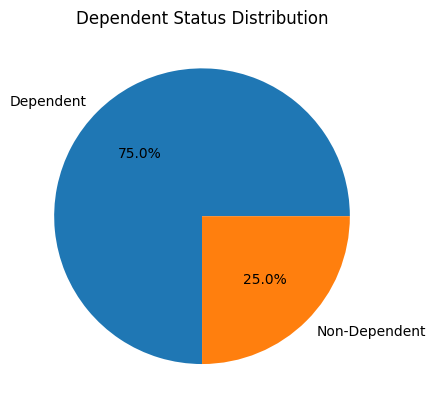

In [36]:
dependent_distribution_pie_chart= df_excluded['dependants_flag'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    labels=['Dependent', 'Non-Dependent'],  
    title='Dependent Status Distribution', 
    ylabel=''
)

In [37]:
# Export the Pie chart

dependent_distribution_pie_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependent_distribution_pie_chart.png'))

In [38]:
# export the updated dataframe

df_excluded.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_excluded.pkl'))

In [39]:
# Importing updated dataframe

df_excluded = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_excluded.pkl'))

# Loyalty Flag vs Age Group

In [41]:
# Crosstab loyalty with age group

loyalty_age_crosstab = pd.crosstab(df_excluded['loyalty_flag'], df_excluded['age_group'], dropna = False)

In [42]:
loyalty_age_crosstab

age_group,adult,middle-aged,senior,young adult
loyalty_flag,,,,
Loyal customer,2393708,4032096,2577838,1280451
New customer,1114687,1886166,1202984,599858
Regular customer,3775520,6167035,3950012,1984209


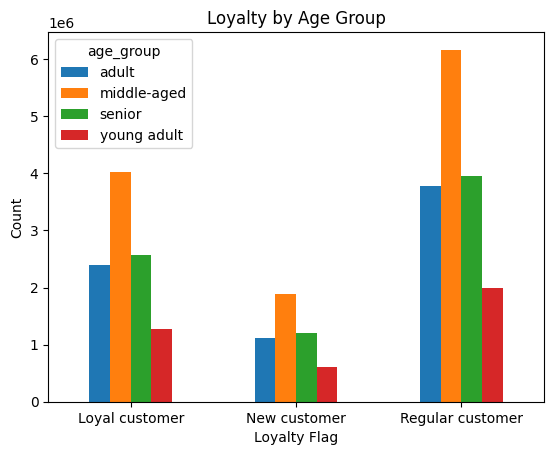

In [43]:
# Create a bar chart

loyalty_age_bar_chart = loyalty_age_crosstab.plot(kind='bar', title='Loyalty by Age Group', xlabel='Loyalty Flag', ylabel='Count', rot=0)

In [44]:
# Export the chart

loyalty_age_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_age_bar_chart.png'))

# Spending Flag vs Age Group

In [46]:
# Crosstab spending with age group

spending_age_crosstab = pd.crosstab(df_excluded['spending_flag'], df_excluded['age_group'], dropna = False)

In [47]:
spending_age_crosstab

age_group,adult,middle-aged,senior,young adult
spending_flag,,,,
High spender,136342,246830,146251,74002
Low spender,7147573,11838467,7584583,3790516


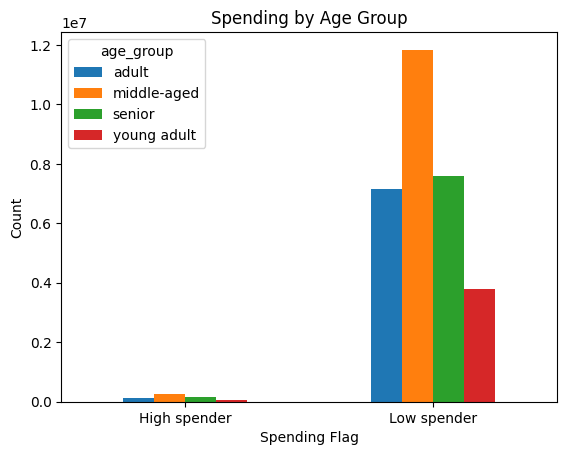

In [48]:
# Create a bar chart

spending_age_bar_chart = spending_age_crosstab.plot(kind='bar', title='Spending by Age Group', xlabel='Spending Flag', ylabel='Count', rot=0)

In [49]:
# Export the chart

spending_age_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_age_bar_chart.png'))

# Loyalty Flag vs Income

In [51]:
# Crosstab loyalty with income

loyalty_income_crosstab = pd.crosstab(df_excluded['loyalty_flag'], df_excluded['income_group'], dropna = False)

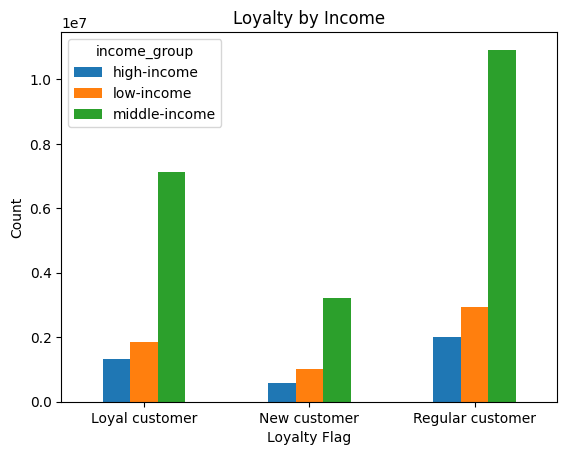

In [52]:
# Create a bar chart

loyalty_income_bar_chart = loyalty_income_crosstab.plot(kind='bar', title='Loyalty by Income', xlabel='Loyalty Flag', ylabel='Count', rot=0)

In [53]:
# Export the chart

loyalty_income_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_income_bar_chart.png'))

# Loyalty Flag vs Number_of_dependents

In [55]:
# Crosstab loyalty with number_of_dependents

loyalty_dependents_crosstab = pd.crosstab(df_excluded['loyalty_flag'], df_excluded['dependants_flag'], dropna = False)

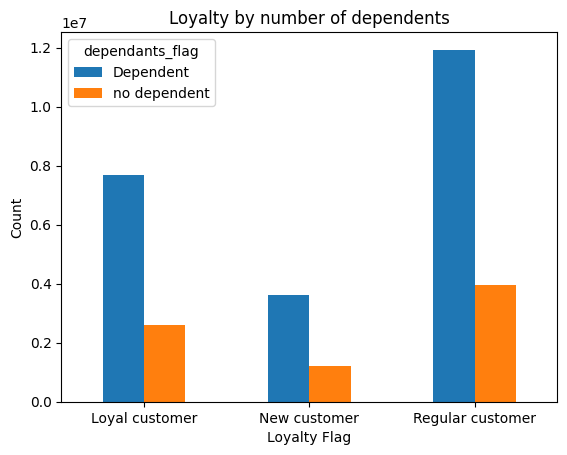

In [56]:
# Create a bar chart

loyalty_dependents_bar_chart = loyalty_dependents_crosstab.plot(kind='bar', title='Loyalty by number of dependents', xlabel='Loyalty Flag', ylabel='Count', rot=0)

In [57]:
# Export the chart

loyalty_dependents_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_dependents_bar_chart.png'))

# Spending Flag vs Loyalty Flag

In [59]:
# Crosstab spending with loyalty

spending_loyalty_crosstab = pd.crosstab(df_excluded['loyalty_flag'], df_excluded['spending_flag'], dropna = False)

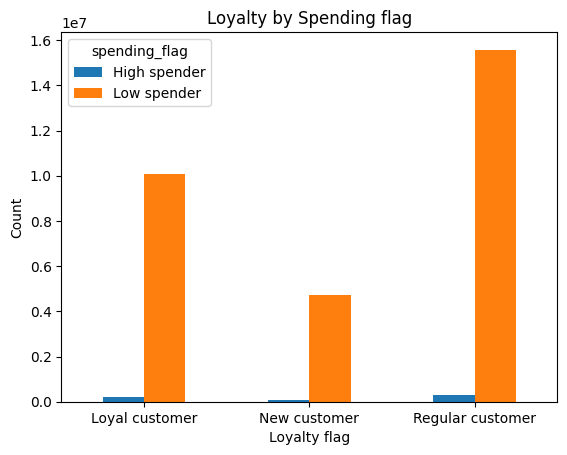

In [60]:
# Create a bar chart

spending_loyalty_bar_chart = spending_loyalty_crosstab.plot(kind='bar', title='Loyalty by Spending flag', xlabel='Loyalty flag', ylabel='Count', rot=0)

In [61]:
# Export the chart

spending_loyalty_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_loyalty_bar_chart.png'))

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [63]:
# Import department dataframe

df_departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [64]:
# Drop _merge column from previous merge

df_excluded.drop(columns = ['_merge'],inplace=True)

In [65]:
df_departments.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

In [ ]:
# Merge df_department dataframe with df_excluded dataframe for further analysis

df_merged_final = df_excluded.merge(df_departments, on='department_id', indicator='created')

In [ ]:
# Exporting updated dataframe

df_merged_final.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers_departments.pkl'))

In [ ]:
# create a customer profile subset and Group by relevant columns and calculate the total price

customer_profile = df_merged_final.groupby(
    ['user_id', 'gender', 'state', 'region', 'number_of_dependents', 'marital_status', 
     'age_group', 'order_number', 'orders_day_of_week', 'order_hour_of_day', 
     'loyalty_flag', 'frequency_flag', 'dependants_flag', 'income_group', 
     'spending_flag']
)['prices'].sum().reset_index()

In [ ]:
customer_profile.head()

In [ ]:
# Aggregate statistics for order_number and prices grouped by user_id

aggregated_data = customer_profile.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

In [ ]:
aggregated_data.head()

In [ ]:
# Aggregate statistics for usage frequency grouped by user_id

aggregated_frequency = df_excluded.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'days_since_prior_order': ['max', 'min', 'mean']})

In [ ]:
aggregated_frequency.head()

# 8. Compare your customer profiles with regions and departments.

# Customer Profiles vs. Regions

In [ ]:
# Crosstab of customer profiles and regions

profiles_regions_crosstab = pd.crosstab( df_merged_final['age_group'], df_merged_final['region'], dropna=False)

In [ ]:
profiles_regions_crosstab

In [ ]:
# create a bar chart

profiles_regions_bar_chart = profiles_regions_crosstab.plot(kind='bar', stacked=True, title='Age group by Regions', xlabel='Age Groups', ylabel='count', rot=0)

In [ ]:
# Export the chart

profiles_regions_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'profiles_regions_bar_chart.png'))

# Profiles vs Departments

In [ ]:
# Crosstab of customer profiles and departments

profiles_departments_crosstab = pd.crosstab( df_merged_final['age_group'], df_merged_final['department'], dropna=False)

In [ ]:
profiles_departments_crosstab

In [ ]:
# create a bar chart

profiles_departments_bar_chart = profiles_departments_crosstab.plot(kind='bar', stacked=True, title='Departments by age group', xlabel='Age Groups', ylabel='count', rot=0, legend=True).legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

In [ ]:
# Export the chart

profiles_departments_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'profiles_departments_bar_chart.png'))

# 9. Produce suitable charts to illustrate your results.

In [ ]:
# import orders_products_customers

df_ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_departments.pkl'))

In [ ]:
# create a bar chart for orders_day_of_week

orders_dow_bar_chart = df_ords_prods['orders_day_of_week'].value_counts().loc[days_map.values()].plot(
    kind='bar', figsize=(10, 6), title='Orders by Day of Week', xlabel='Day of Week', ylabel='Number of Orders', rot=0)

In [ ]:
# Export bar chart

orders_dow_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_dow_bar_chart.png'))

In [ ]:
# histogram of hours of the day

plt.figure(figsize=(10, 6))
df_ords_prods['order_hour_of_day'].plot.hist(bins=24, alpha=0.7, title='Order Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')

In [ ]:
# Export hiostogram

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hours_of_day_histogram.png'))
plt.show()

In [ ]:
# bar chart frequency of orders vs department

depts_bar_chart = df_merged_final['department'].value_counts(ascending=True).plot(kind='barh', xlabel = 'Count', title='Products Ordered by Department')

In [ ]:
# Export bar chart
depts_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'depts_bar_chart.png'))